In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('train.csv', index_col='Loan_ID')

In [6]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


# 1. Boolean Indexing

In [7]:
data.loc[(data.Gender == 'Female') & (data.Education == 'Not Graduate') 
        & (data.Loan_Status == 'Y'), ['Gender', 'Education', 'Loan_Status']]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


# 2. 'Apply' Function

In [8]:
# a new funcion:
def num_missing(x):
    return sum(x.isnull())

In [9]:
# applying per column:
data.apply(num_missing, axis = 0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# applying per row:
data.apply(num_missing, axis = 1).head(5)

Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64

# 3. Imputing missing values

1. get the replacing value

In [11]:
from scipy.stats import mode

In [12]:
mode(data.Gender)

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [13]:
# 'mode' is an array
mode(data.Gender).mode[0]

'Male'

2. replace

In [14]:
# 'inplace = True' will CHANGE the original data
data.Gender.fillna(mode(data.Gender).mode[0], inplace=True)

In [15]:
data.Married.fillna(mode(data.Married).mode[0], inplace=True)

In [16]:
data.Self_Employed.fillna(mode(data.Self_Employed).mode[0], inplace=True)

In [17]:
data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 4. Pivot Table

In [18]:
impute_grps = data.pivot_table(values=['LoanAmount'], 
                 index=['Gender', 'Married', 'Self_Employed'], 
                aggfunc=np.mean)
impute_grps

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

In [19]:
data.pivot_table(values=['Self_Employed'], 
                index=['Gender'],
                aggfunc=np.count_nonzero)

,Self_Employed
Gender,
Female,112
Male,502


# 5. Multi-Indexing

In [20]:
# iterate through rows with missing 'LoanAmount'
for i, row in data.loc[data.LoanAmount.isnull(), :].iterrows():
    indices = tuple([row['Gender'], row['Married'], row['Self_Employed']])
    data.loc[i, 'LoanAmount'] = impute_grps.loc[indices].values[0]

In [21]:
data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 6. Crosstab

In [22]:
def percentConvert(frequency):
    return frequency / float(frequency[-1])

In [23]:
pd.crosstab(data.Credit_History, data.Loan_Status, margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [24]:
pd.crosstab(data.Credit_History, data.Loan_Status, 
            margins=True).apply(percentConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


# 7. Merge Dataframes

In [25]:
prop_rates = pd.DataFrame([1000, 5000, 12000], 
                          index = ['Rural', 'Semiurban', 'Urban'], 
                         columns = ['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [26]:
data_merged = data.merge(right=prop_rates, how='inner', 
                        left_on='Property_Area',right_index=True, 
                        sort=False)
data_merged

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rates
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,12000
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,12000
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12000
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,12000
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002933,Male,No,3+,Graduate,Yes,9357,0.0,292.000000,360.0,1.0,Semiurban,Y,5000
LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N,5000
LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.000000,360.0,1.0,Semiurban,Y,5000


In [27]:
data_merged.pivot_table(values='Credit_History', 
                        index=['Property_Area','rates'],
                       aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


# 8. Sorting DataFrames

In [28]:
data_sorted = data.sort_values(['ApplicantIncome', 'CoapplicantIncome'], 
                              ascending=False)
data_sorted[['ApplicantIncome', 'CoapplicantIncome']]

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
...,...,...
LP001644,674,5296.0
LP002603,645,3683.0
LP002949,416,41667.0


# 9. Boxplot & Histogram

In [29]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

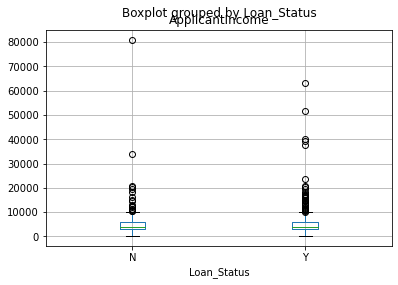

In [30]:
data.boxplot(column = 'ApplicantIncome', by = 'Loan_Status')

array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

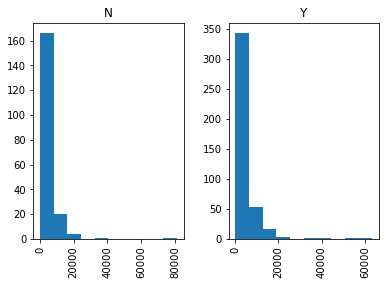

In [31]:
data.hist(column = 'ApplicantIncome', by = 'Loan_Status')

# 10. Cut function for binning

In [32]:
def binning(col, cut_points, labels=None):
    # Define min and max values
    minvalue = col.min()
    maxvalue = col.max()
    
    # create list by adding min and max to cut_points
    break_points = [minvalue] + cut_points + [maxvalue]
    
    # if no labels provided, use default labels
    if not labels:
        labels = range(len(cut_points) + 1)
    
    # Binning using cut function of pandas
    colBin = pd.cut(col, bins = break_points, labels = labels, 
                   include_lowest=True)
    return colBin

In [33]:
cut_points = [90, 140, 190]
labels = ['low', 'medium', 'high', 'very high']
data['LoanAmount_Bin'] = binning(data['LoanAmount'], 
                                cut_points, 
                                labels)
data['LoanAmount_Bin']

Loan_ID
LP001002       medium
LP001003       medium
LP001005          low
LP001006       medium
LP001008         high
              ...    
LP002978          low
LP002979          low
LP002983    very high
LP002984         high
LP002990       medium
Name: LoanAmount_Bin, Length: 614, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

In [34]:
pd.value_counts(data['LoanAmount_Bin'])

medium       273
high         146
low          104
very high     91
Name: LoanAmount_Bin, dtype: int64

# 11. Coding nominal data

In [70]:
def coding(col, codeDict):
    colCoded = pd.Series(col, copy = True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace = True)
    return colCoded

In [71]:
pd.value_counts(data.Loan_Status)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [72]:
data.Loan_Status_Coded = coding(data.Loan_Status, {'N':0, 'Y':1})

In [73]:
pd.value_counts(data.Loan_Status_Coded)

1    422
0    192
Name: Loan_Status, dtype: int64

In [74]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,medium
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,medium
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,low
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,medium
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,low
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,low
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,very high
